In [344]:
import pandas as pd
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns

In [253]:
dataset = pd.read_csv('..\dataset\water_potability_final.csv')
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [255]:
# Conditions for attribute levels

def ph(x):
    if x<6.5:
        return 0
    elif x<=8.5 and x>=6.5:
        return 1
    else:
        return 2

def hard(x):
    if x<60:
        return 0
    elif x<=120 and x>=60:
        return 1
    else:
        return 2

def tds(x):
    if x<50:
        return 0
    elif x<=150 and x>=50:
        return 1
    else:
        return 2

def chlr(x):
    if x<=4:
        return 0
    else:
        return 1

def slft(x):
    if x<250:
        return 0
    else:
        return 1

def cdty(x):
    if x<=400:
        return 0
    else:
        return 1

def crbn(x):
    if x<4:
        return 0
    else:
        return 1

def thts(x):
    if x<=80:
        return 0
    else:
        return 1

def tbty(x):
    if x<5:
        return 0
    else:
        return 1

In [256]:
ph_list = np.random.uniform(6.5,8.5,300)
hard_list = np.random.uniform(60,120,300)
tds_list = np.random.uniform(50,150,300)
chlr_list = np.random.uniform(0,4,300)
slft_list = np.random.uniform(0,250,300)
cdty_list = np.random.uniform(0,400,300)
crbn_list = np.random.uniform(0,4,300)
thts_list = np.random.uniform(0,80,300)
tbty_list = np.random.uniform(0,5,300)
ptby_list = [1]*300
col = dataset.columns.values
vals = [ph_list,hard_list,tds_list,chlr_list,slft_list,cdty_list,crbn_list,thts_list,tbty_list,ptby_list]
dat = pd.DataFrame(columns=col)

for i in range(len(col)):
    dat[col[i]] = vals[i]

print(dat)

           ph    Hardness      Solids  Chloramines     Sulfate  Conductivity  \
0    7.219343   91.841124   94.034906     0.909911  108.513458    290.097467   
1    8.418293   64.182137   53.638651     2.804121  215.236550    386.067022   
2    8.244682   88.157428  127.730405     3.574391   17.491267    259.329013   
3    7.436114   77.993373  132.421371     2.127855  219.769459    359.451037   
4    7.877943  102.275564   87.753711     0.373306   55.592889     63.698078   
..        ...         ...         ...          ...         ...           ...   
295  8.386194  111.733870   88.042286     1.312487    1.348697    315.748239   
296  7.108122  111.450746   83.312879     1.728818   17.582341    305.941274   
297  7.373585   62.544732  104.903470     1.413735   54.561691    204.136315   
298  7.622562  111.265824  139.516696     3.417874    9.826571    161.304474   
299  7.536558  110.185524  114.433326     0.560558   30.462254    370.229039   

     Organic_carbon  Trihalomethanes  T

In [257]:
f_dataset = dataset.append(dat, ignore_index= True)
f_dataset = f_dataset.sample(frac = 1)
print(f_dataset)

            ph    Hardness        Solids  Chloramines     Sulfate  \
1500  4.310701  138.431894  11842.757806     5.607450  364.458497   
1175  6.864917  170.827792  20464.772694     7.074063  365.941346   
202   7.886591  213.052591  38852.029636    11.170789  281.700777   
1111  7.740454  182.541073  19713.504368     8.854386  382.341590   
214   4.296247  278.147524  19672.487213     4.955218  414.636726   
...        ...         ...           ...          ...         ...   
1187  6.281904  160.306685  17095.270070     6.730577  305.094000   
928   6.977268  223.278891  20287.359770     5.274745  282.085719   
1066  5.999125  219.716109  19345.791332     6.029641  264.285069   
1625  8.775047  191.526874  21768.640744     4.751005  387.245552   
417   3.623166  156.898917  26738.525361     5.023143  388.752253   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
1500    426.369592       19.588327        48.118629   3.172375           1  
1175    400.96527

In [268]:
f_dataset.to_csv('final_dataset.csv')

In [285]:
f_dataset = pd.read_csv('final_dataset.csv')
f_dataset.drop(columns=[f_dataset.columns[0],f_dataset.columns[1]], axis=1, inplace=True)
f_dataset.to_csv('water_potability_final.csv', index=False)

In [278]:
X = f_dataset.drop(['Potability'], axis=1)
y = f_dataset['Potability']
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,5.057271,155.487725,19003.963899,6.250893,305.849797,518.101816,15.772438,97.199077,4.432271
1,5.735724,158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954
2,6.810467,209.735559,32602.340084,7.422781,341.174269,340.030089,16.736749,42.349461,4.402340
3,4.296247,278.147524,19672.487213,4.955218,414.636726,330.067379,11.293187,70.665540,4.163329
4,9.058628,155.357557,15737.468938,7.251979,343.233977,463.389256,17.854470,83.175189,3.652134
...,...,...,...,...,...,...,...,...,...
2306,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712
2307,8.249551,230.932832,32898.749368,7.019971,280.674984,364.931128,17.051185,69.781641,4.284831
2308,3.623166,156.898917,26738.525361,5.023143,388.752253,388.752620,17.196012,63.564870,5.370206
2309,8.951652,205.892346,15189.327822,3.016033,283.867695,406.309187,19.125825,65.639328,1.844372


In [346]:

cond = [ph,hard,tds, chlr, slft, cdty, crbn, thts, tbty]
col = X.columns.values
data = pd.DataFrame(columns=col)

for i in range(len(col)):
    data[col[i]] = f_dataset[col[i]].apply(cond[i])
X = data
print(X)

      ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
0      0         2       2            1        1             1   
1      0         2       2            1        1             1   
2      1         2       2            1        1             0   
3      0         2       2            1        1             0   
4      2         2       2            1        1             1   
...   ..       ...     ...          ...      ...           ...   
2306   0         2       2            1        1             1   
2307   1         2       2            1        1             0   
2308   0         2       2            1        1             0   
2309   2         2       2            0        1             1   
2310   1         2       2            1        1             1   

      Organic_carbon  Trihalomethanes  Turbidity  
0                  1                1          0  
1                  1                0          0  
2                  1                0          0  
3  

0.6916

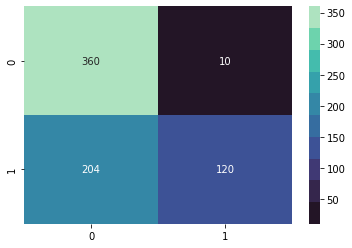

In [380]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.30, random_state= 41)
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_valid)
colors= sns.color_palette("mako", 10)
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap=colors)
acc = round(accuracy_score(y_valid, y_pred), 4)
acc

In [386]:
def pred(par):
    cond = [ph,hard,tds, chlr, slft, cdty, crbn, thts, tbty]
    vals = []
    for i in range(len(par)):
        vals += [cond[i](par[i])]
    print(vals)
    ans = NB.predict([vals])
    return ans

print(pred([1000,1000,1000,1000,1000,1000,1000,1000,1000]))

[2, 2, 2, 1, 1, 1, 1, 1, 1]
[0]


c:\Users\TUF GAMING A15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
